In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('credit_card.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


#### Q1. What does the primary analysis of several categorical features reveal?

In [3]:
df.shape

(8950, 18)

In [14]:
for i in df.columns:
    print(i,' -> ',df[i].nunique())
    

CUST_ID  ->  8950
BALANCE  ->  8871
BALANCE_FREQUENCY  ->  43
PURCHASES  ->  6203
ONEOFF_PURCHASES  ->  4014
INSTALLMENTS_PURCHASES  ->  4452
CASH_ADVANCE  ->  4323
PURCHASES_FREQUENCY  ->  47
ONEOFF_PURCHASES_FREQUENCY  ->  47
PURCHASES_INSTALLMENTS_FREQUENCY  ->  47
CASH_ADVANCE_FREQUENCY  ->  54
CASH_ADVANCE_TRX  ->  65
PURCHASES_TRX  ->  173
CREDIT_LIMIT  ->  205
PAYMENTS  ->  8711
MINIMUM_PAYMENTS  ->  8636
PRC_FULL_PAYMENT  ->  47
TENURE  ->  7


#### inference : 
we can see that there manu unique values in the dataset like balance have 8871 unique vaules<br>
there are 43 type of balance frequency and 205 unique credit limit<br>
8636 minimum payments etc

In [16]:
df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [28]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

#### inference : Here, only CUST_ID is object and every other columns are numerical

ps: as we proceed further, we'll do analysis further (whenever required in other steps)

#### Q2. Perform the following Exploratory Data Analysis tasks: 
#### a. Missing Value Analysis
#### b. Outlier Treatment
#### c. Deal with correlated variables

### Handling Null values

In [17]:
nv = df.isnull().sum()
nv[nv>0]

CREDIT_LIMIT          1
MINIMUM_PAYMENTS    313
dtype: int64

#### Inference: null values are not more than 70% so we will fill it
We see that there is one NULL value for CREDIT_LIMIT and 313 NULL values for MINIMUM_PAYMENTS. Before we fill in the NULL values, we need to understand what these attributes are doing.<br>

When MINIMUM_PAYMENTS is null, it is safe to assume that no minimum payment was made. This means we can convert all the NULL values in MINIMUM_PAYMENTS to 0.<br>
When MINIMUM_PAYMENTS is NULL, the most rational assumption is that there is no credit limit for that particular customer. Once again, we can set it to 0.

In [20]:
df = df.fillna(0)

In [21]:
nv = df.isnull().sum()
nv[nv>0]

Series([], dtype: int64)

### Handling Duplicate Values

In [22]:
df.duplicated().sum()

0

#### inference : no duplicate values found

In [23]:
df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

#### inference: there is only one object column i.e.  CUST_ID but for PCA & clustering we dont need CUST_ID column so its safe to drop it or make another dataframe without it and work on it

In [24]:
df1 = df.drop("CUST_ID", axis=1)

In [25]:
df1.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [26]:
df1.shape

(8950, 17)

In [27]:
df1.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

#### univariate analysis

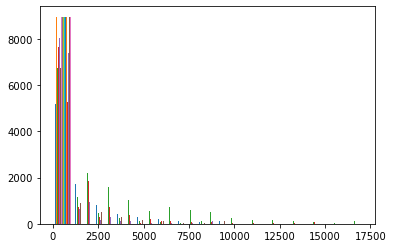

In [44]:
plt.hist(x=df1,bins=15)
plt.show()

#### bivariate analysis using pairplot

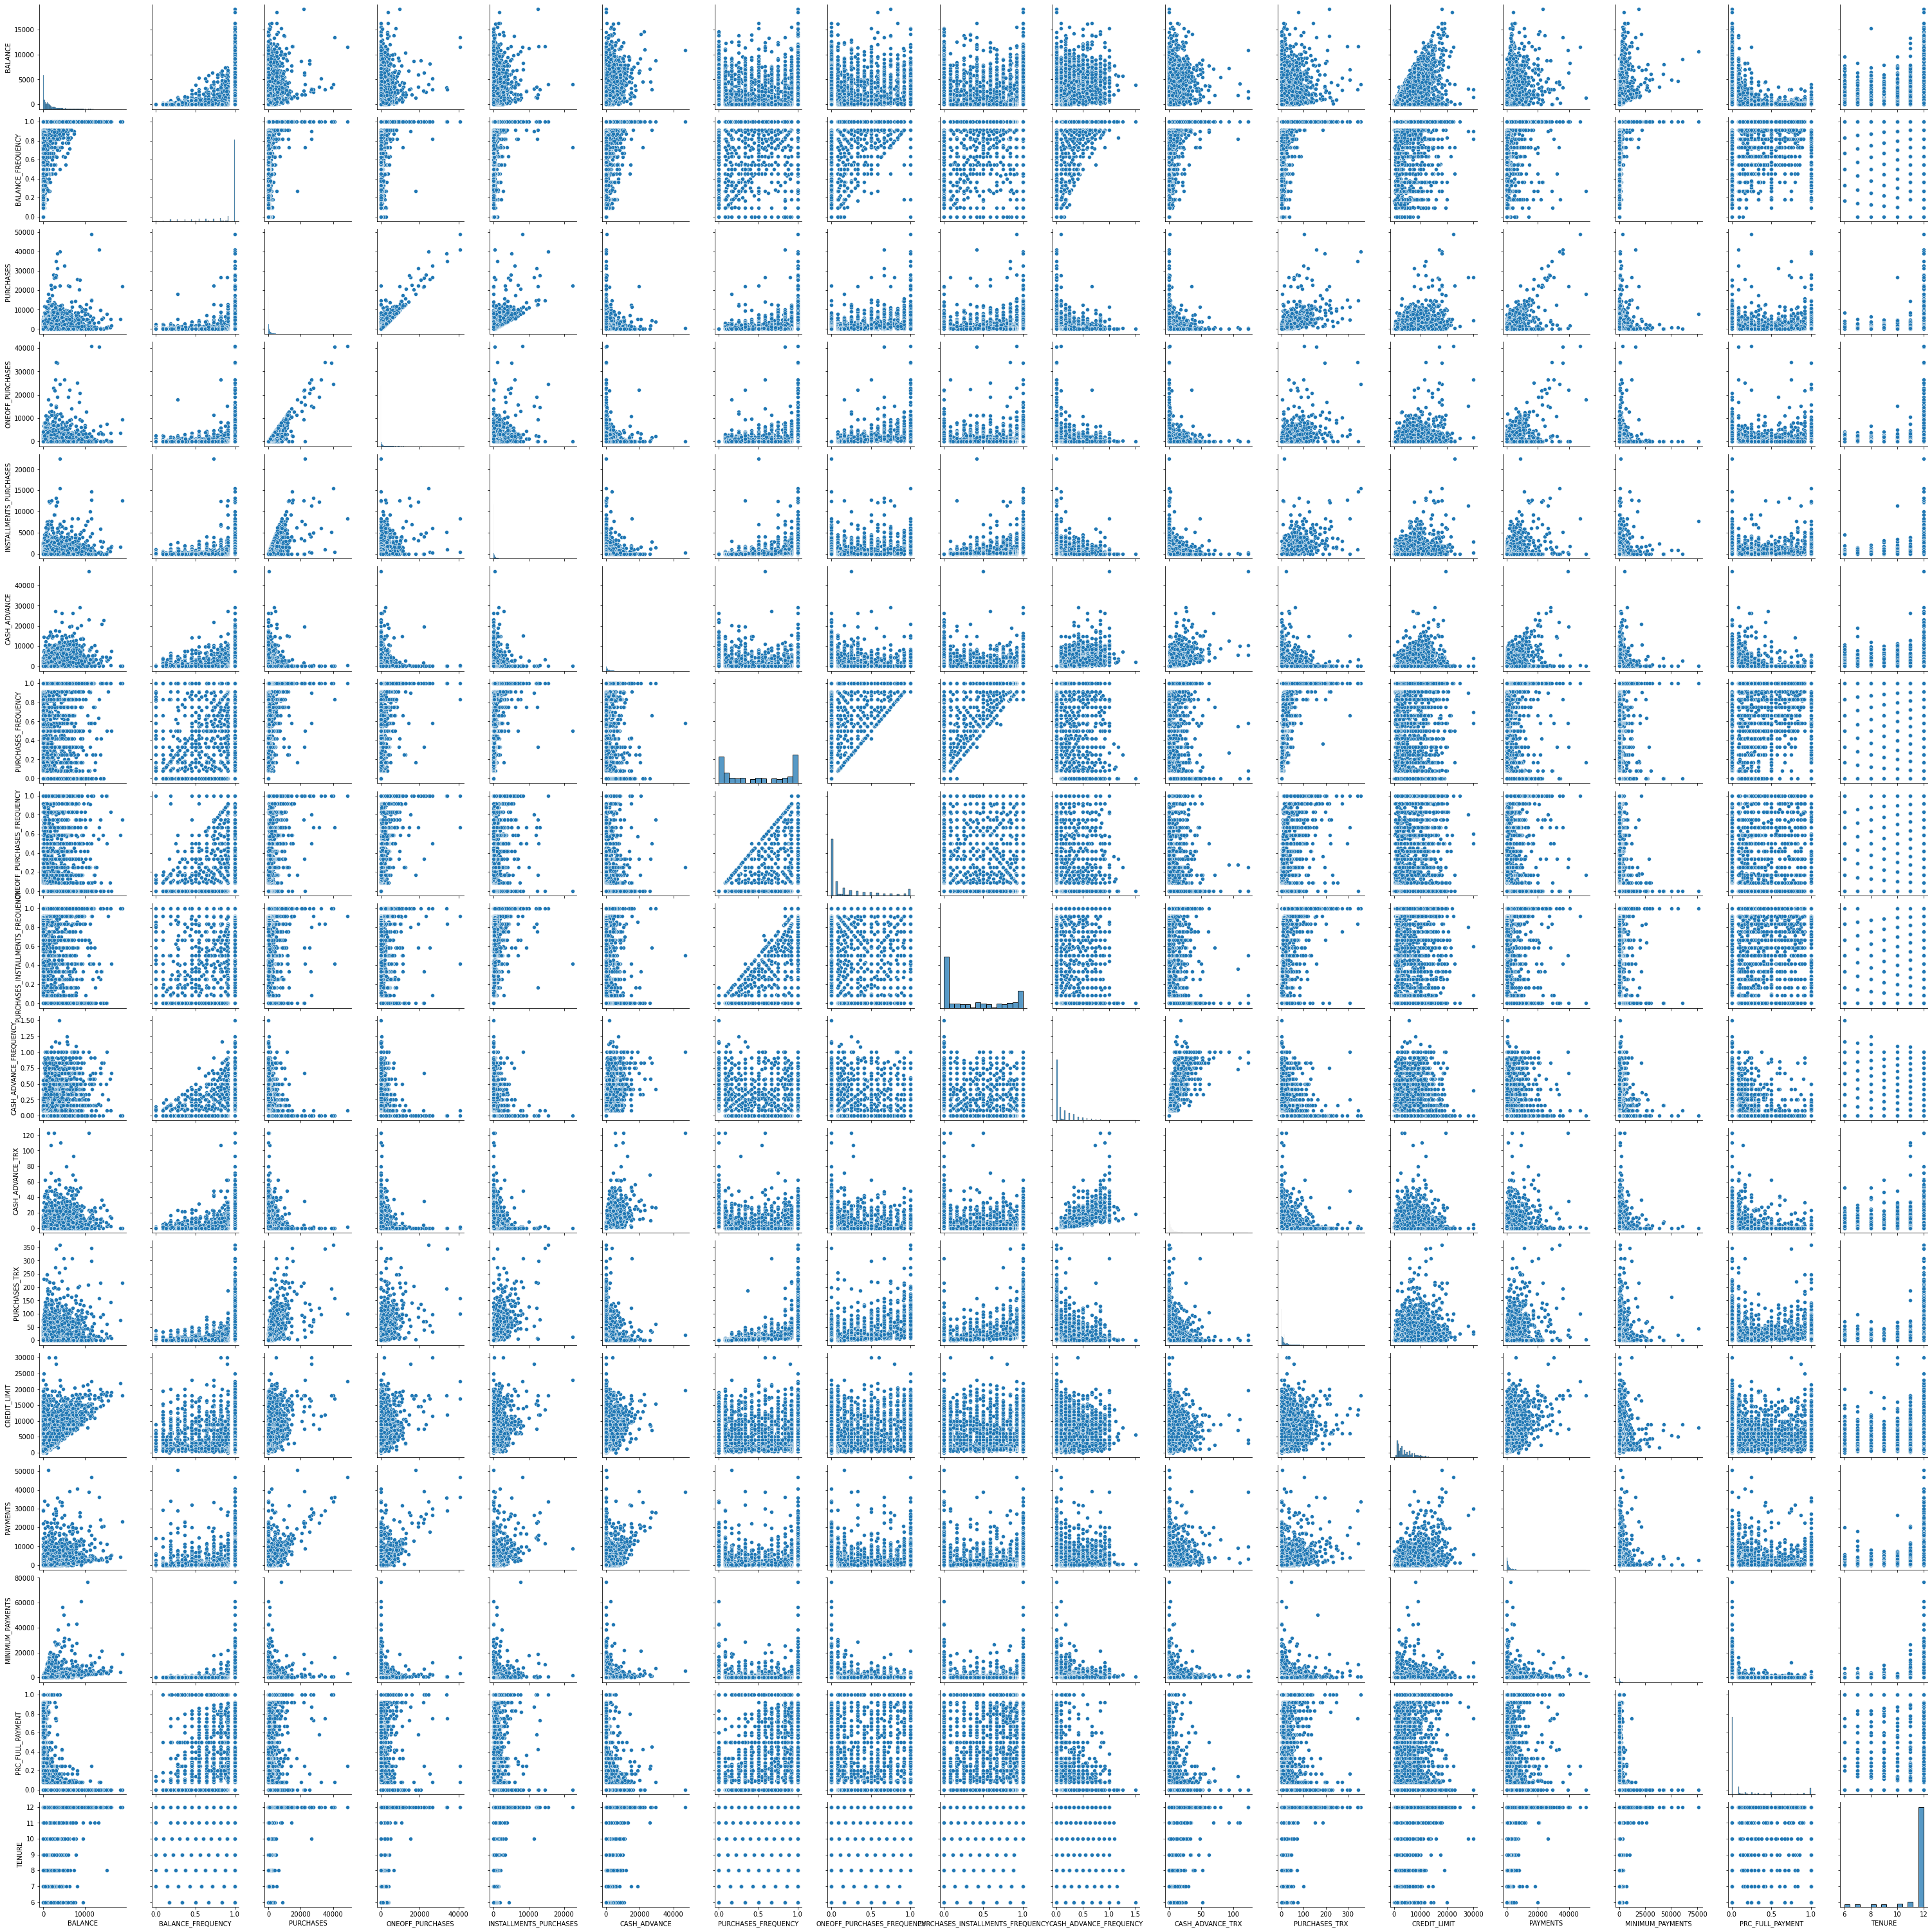

In [17]:
sns.pairplot(data=df1)
plt.show()

#### inference: we observe that this data is not suitable for linear regression or classifciation. So, here we can do clustering

#### Checking outliers using boxplot

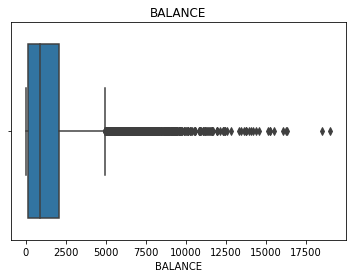

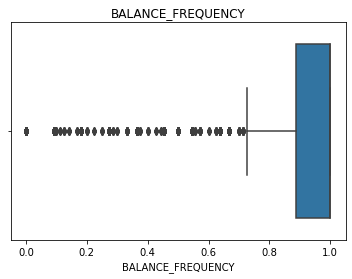

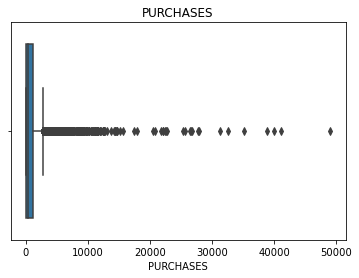

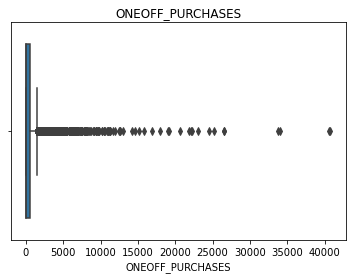

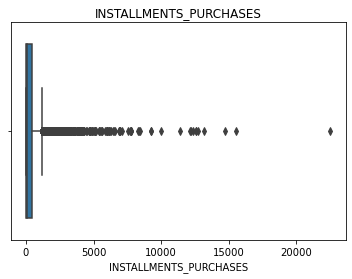

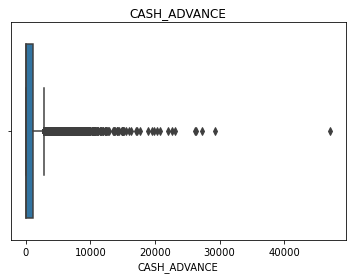

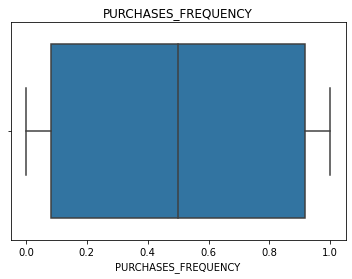

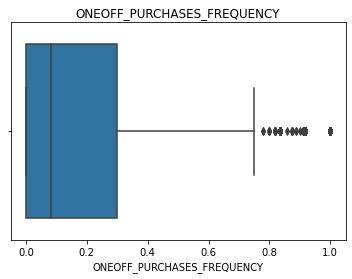

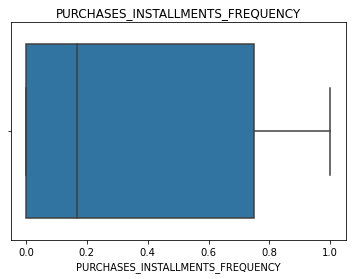

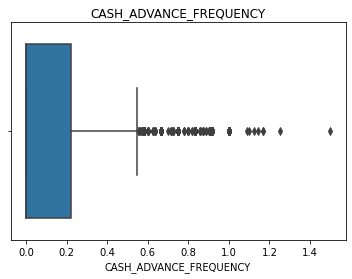

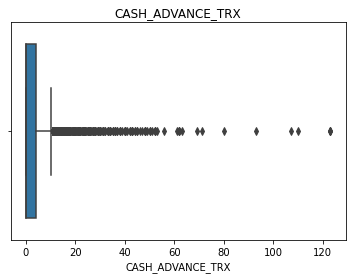

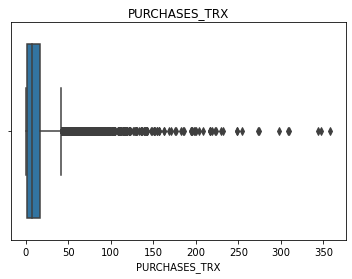

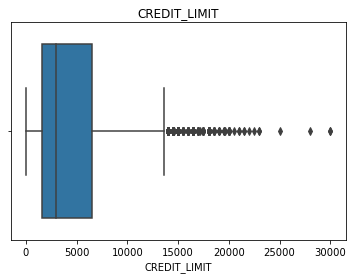

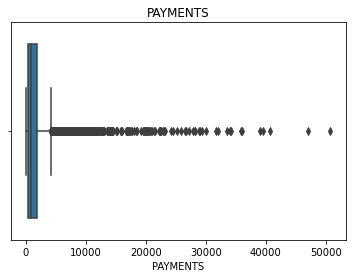

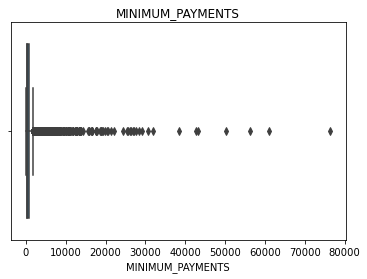

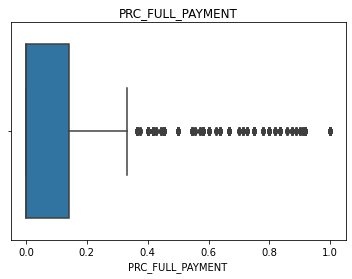

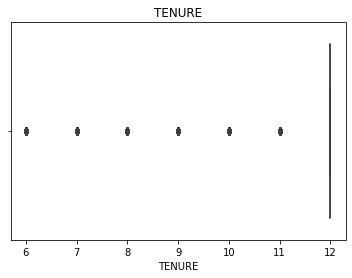

In [20]:
for i in df1.columns: # for finding outliers 
    sns.boxplot(x=df1[i])
    plt.title(i)
    plt.show()

#### here every feature have outliers execpt  PURCHASES_INSTALLMENTS_FREQUENCY and PURCHASES_FREQUENCY

#### Handling outliers

In [33]:
df1.describe(percentiles=[0.01,0.02,0.05,0.97,0.98,0.99]).T

,count,mean,std,min,1%,2%,5%,50%,97%,98%,99%,max
BALANCE,8950.0,1564.474828,2081.531879,0.0,0.065101,2.140114,8.814518,873.385231,7084.980717,7969.618588,9338.804814,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.0,0.090909,0.166667,0.272727,1.000000,1.000000,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.0,0.000000,0.000000,0.000000,361.280000,5183.451700,6335.768000,8977.290000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.0,0.000000,0.000000,0.000000,38.000000,3609.960800,4432.586800,6689.898200,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.0,0.000000,0.000000,0.000000,89.000000,2273.257000,2757.385000,3886.240500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.0,0.000000,0.000000,0.000000,0.000000,6010.909102,7298.609172,9588.163357,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.0,0.000000,0.000000,0.000000,0.500000,1.000000,1.000000,1.000000,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.0,0.000000,0.000000,0.000000,0.083333,1.000000,1.000000,1.000000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.0,0.000000,0.000000,0.000000,0.166667,1.000000,1.000000,1.000000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.0,0.000000,0.000000,0.000000,0.000000,0.666667,0.750000,0.833333,1.50000


In [34]:
def outlier_handle(x):
    x = x.clip(upper=x.quantile(0.99))
    x = x.clip(lower=x.quantile(0.01))
    return x

In [35]:
df1 = df1.apply(outlier_handle)

In [36]:
df1.describe(percentiles=[0.01,0.02,0.05,0.97,0.98,0.99]).T

,count,mean,std,min,1%,2%,5%,50%,97%,98%,99%,max
BALANCE,8950.0,1541.046707,1966.597484,0.065101,0.065248,2.140114,8.814518,873.385231,7084.980717,7969.618588,9337.094398,9338.804814
BALANCE_FREQUENCY,8950.0,0.878083,0.234032,0.090909,0.090909,0.166667,0.272727,1.000000,1.000000,1.000000,1.000000,1.000000
PURCHASES,8950.0,936.229237,1525.185179,0.000000,0.000000,0.000000,0.000000,361.280000,5183.451700,6335.768000,8961.796200,8977.290000
ONEOFF_PURCHASES,8950.0,536.493774,1096.913512,0.000000,0.000000,0.000000,0.000000,38.000000,3609.960800,4432.586800,6684.195482,6689.898200
INSTALLMENTS_PURCHASES,8950.0,384.498368,676.271068,0.000000,0.000000,0.000000,0.000000,89.000000,2273.257000,2757.385000,3885.853155,3886.240500
CASH_ADVANCE,8950.0,935.920972,1775.774147,0.000000,0.000000,0.000000,0.000000,0.000000,6010.909102,7298.609172,9584.005151,9588.163357
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.000000,0.000000,0.000000,0.500000,1.000000,1.000000,1.000000,1.000000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.000000,0.000000,0.083333,1.000000,1.000000,1.000000,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.000000,0.000000,0.166667,1.000000,1.000000,1.000000,1.000000
CASH_ADVANCE_FREQUENCY,8950.0,0.134017,0.195550,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.750000,0.833333,0.833333


## Handling Correlation

In [45]:
corr =df1.corr()
corr

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.336473,0.165697,0.155082,0.093372,0.541226,-0.087193,0.070796,-0.072010,0.463637,0.445766,0.133319,0.529001,0.344744,0.597461,-0.331618,0.074122
BALANCE_FREQUENCY,0.336473,1.000000,0.170515,0.137893,0.153734,0.107785,0.232890,0.202845,0.179472,0.193894,0.162818,0.212610,0.098694,0.092491,0.228010,-0.098040,0.121525
PURCHASES,0.165697,0.170515,1.000000,0.885793,0.708735,-0.091164,0.504218,0.608351,0.400843,-0.149419,-0.099497,0.780817,0.367503,0.536270,0.135301,0.202887,0.107263
ONEOFF_PURCHASES,0.155082,0.137893,0.885793,1.000000,0.333809,-0.064195,0.349884,0.683819,0.158892,-0.103046,-0.067593,0.630735,0.342685,0.482418,0.067627,0.145981,0.080378
INSTALLMENTS_PURCHASES,0.093372,0.153734,0.708735,0.333809,1.000000,-0.102052,0.551693,0.248240,0.634500,-0.162397,-0.111387,0.687538,0.240003,0.369886,0.152061,0.215048,0.103310
CASH_ADVANCE,0.541226,0.107785,-0.091164,-0.064195,-0.102052,1.000000,-0.249835,-0.104954,-0.207395,0.683400,0.710309,-0.112613,0.314412,0.425517,0.263066,-0.179068,-0.083485
PURCHASES_FREQUENCY,-0.087193,0.232890,0.504218,0.349884,0.551693,-0.249835,1.000000,0.501343,0.862934,-0.312493,-0.238395,0.642234,0.119747,0.120897,0.004280,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.070796,0.202845,0.608351,0.683819,0.248240,-0.104954,0.501343,1.000000,0.142329,-0.113575,-0.081339,0.601289,0.296164,0.278313,-0.012630,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.072010,0.179472,0.400843,0.158892,0.634500,-0.207395,0.862934,0.142329,1.000000,-0.265907,-0.200169,0.593674,0.060347,0.097830,0.034722,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.463637,0.193894,-0.149419,-0.103046,-0.162397,0.683400,-0.312493,-0.113575,-0.265907,1.000000,0.881092,-0.151307,0.134710,0.215544,0.210388,-0.253292,-0.129136


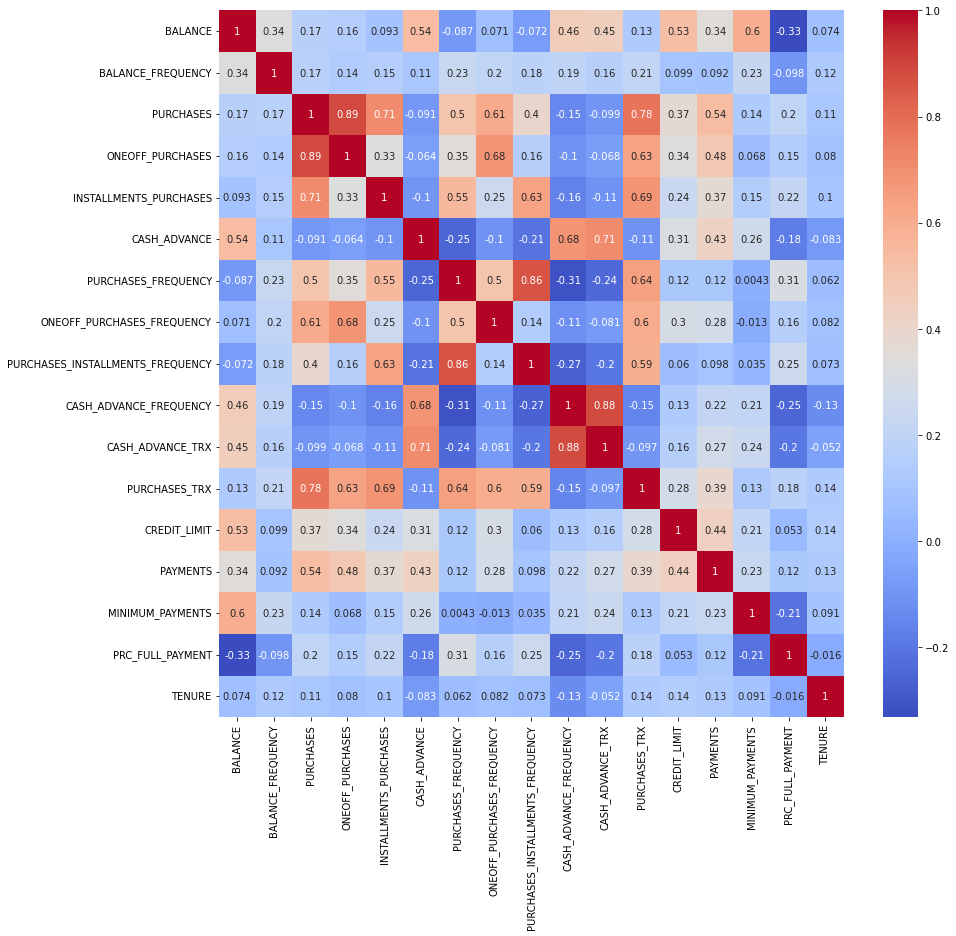

In [46]:
plt.figure(figsize=(14,13))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

In [47]:
df1.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

### inference:
#### pair having  correlation value above 80% : 
            PURCHASES_FREQUENCY & PURCHASES_INSTALLMENTS_FREQUENCY
            CASH_ADVANCE_FREQUENCY & CASH_ADVANCE_TRX
            
    

here we are not going go drop columns in original , we are going to drop columns in copy<br>
then we will apply pca on both original and copy and find which gives more bineficial vlaue and then use most beneficial for clustering 

In [50]:
df2 = df1.drop(['PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_TRX'],axis=1)

In [51]:
df2.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.000000,2.0,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.250000,0.0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,12.0,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.083333,1.0,7500.0,0.000000,0.000000,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,1.0,1200.0,678.334763,244.791237,0.000000,12


In [52]:
df2.shape

(8950, 15)

In [53]:
df1.shape

(8950, 17)

In [55]:
x1=df1
x2=df2

print(x1.shape)
print(x2.shape)

(8950, 17)
(8950, 15)


#### Q3. Perform dimensionality reduction using PCA such that the 95% of the variance is explained.

#### standard scalling for PCA

In [54]:
from sklearn.preprocessing import StandardScaler

In [57]:
sc = StandardScaler()
x_sc1 = sc.fit_transform(x1)
print('standardized data \n',x_sc1)


standardized data 
 [[-0.76285553 -0.25596817 -0.55132729 ... -0.48217712 -0.52555097
   0.36067954]
 [ 0.84486711  0.13250091 -0.61388057 ...  0.27137708  0.2342269
   0.36067954]
 [ 0.48518086  0.52096999 -0.10691708 ... -0.08814527 -0.52555097
   0.36067954]
 ...
 [-0.7717557  -0.19122546 -0.51919825 ... -0.52829641  0.32919999
  -4.12276757]
 [-0.77681097 -0.19122546 -0.61388057 ... -0.54983497  0.32919999
  -4.12276757]
 [-0.59412458 -0.90341664  0.10295769 ... -0.52355406 -0.52555097
  -4.12276757]]


In [58]:
x_sc2 = sc.fit_transform(x2)
print('standardized data \n',x_sc2)

standardized data 
 [[-0.76285553 -0.25596817 -0.55132729 ... -0.48217712 -0.52555097
   0.36067954]
 [ 0.84486711  0.13250091 -0.61388057 ...  0.27137708  0.2342269
   0.36067954]
 [ 0.48518086  0.52096999 -0.10691708 ... -0.08814527 -0.52555097
   0.36067954]
 ...
 [-0.7717557  -0.19122546 -0.51919825 ... -0.52829641  0.32919999
  -4.12276757]
 [-0.77681097 -0.19122546 -0.61388057 ... -0.54983497  0.32919999
  -4.12276757]
 [-0.59412458 -0.90341664  0.10295769 ... -0.52355406 -0.52555097
  -4.12276757]]


In [59]:
print(x_sc1.shape)
print(x_sc2.shape)

(8950, 17)
(8950, 15)


In [60]:
from sklearn.decomposition import PCA
# principal component analysis

In [61]:
pca1 = PCA()
pc1 = pca1.fit(x_sc1)
pc1 = pc1.transform(x_sc1)
print(pc1.shape)

(8950, 17)


In [64]:
pca2 = PCA()
pc2 = pca2.fit(x_sc2)
pc2 = pc2.transform(x_sc2)
print(pc2.shape)

(8950, 15)


In [65]:
eig_val1 = pd.DataFrame({'Var':pca1.explained_variance_})
eig_val1.head()

,Var
0,4.645260
1,3.059111
2,1.275473
3,1.045366
4,0.983993


In [66]:
eig_val2 = pd.DataFrame({'Var':pca2.explained_variance_})
eig_val2.head()

,Var
0,4.645260
1,3.059111
2,1.275473
3,1.045366
4,0.983993


In [67]:
eig_val1['Contri'] = eig_val1['Var']*100/eig_val1['Var'].sum()
eig_val1.head()

,Var,Contri
0,4.645260,30.964940
1,3.059111,20.391794
2,1.275473,8.502204
3,1.045366,6.968326
4,0.983993,6.559222


In [68]:
eig_val2['Contri'] = eig_val2['Var']*100/eig_val2['Var'].sum()
eig_val2.head()

,Var,Contri
0,4.645260,30.964940
1,3.059111,20.391794
2,1.275473,8.502204
3,1.045366,6.968326
4,0.983993,6.559222


In [69]:
eig_val1['CumSum'] = eig_val1['Contri'].cumsum()
eig_val1.tail()

,Var,Contri,CumSum
10,0.251140,1.674081,95.764677
11,0.229219,1.527955,97.292633
12,0.203462,1.356262,98.648894
13,0.189749,1.264849,99.913743
14,0.012940,0.086257,100.000000


In [70]:
eig_val2['CumSum'] = eig_val2['Contri'].cumsum()
eig_val2.tail()

,Var,Contri,CumSum
10,0.251140,1.674081,95.764677
11,0.229219,1.527955,97.292633
12,0.203462,1.356262,98.648894
13,0.189749,1.264849,99.913743
14,0.012940,0.086257,100.000000


In [71]:
eig_val1[eig_val1['CumSum']<96].tail()

,Var,Contri,CumSum
6,0.722787,4.818043,83.989657
7,0.612134,4.080437,88.070094
8,0.510050,3.399957,91.470051
9,0.393126,2.620546,94.090596
10,0.251140,1.674081,95.764677


In [72]:
eig_val2[eig_val2['CumSum']<96].tail()

,Var,Contri,CumSum
6,0.722787,4.818043,83.989657
7,0.612134,4.080437,88.070094
8,0.510050,3.399957,91.470051
9,0.393126,2.620546,94.090596
10,0.251140,1.674081,95.764677


#### inference: here we are getting same result in both the data frames (original(df1) and copy(df2)). So we are continuing with df1 for k-cluster 

In [78]:
res_df1 = pd.DataFrame(pc1)
res_df1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-1.773782,-1.405071,0.190195,-0.712168,-0.006741,-0.110037,-0.698820,0.164491,0.339929,0.043885,-0.101192,0.164432,0.087995,0.111961,0.136070,0.057578,-0.006599
1,-1.516522,2.721042,0.601677,0.303583,1.355055,-0.515998,0.591977,0.246409,0.595173,1.156450,-0.407989,1.270446,0.557188,0.442251,-0.464210,-0.074714,0.007166
2,1.032380,-0.293308,0.870785,-1.566775,-1.480624,-0.483032,1.432586,-0.995678,-0.862096,0.423739,-1.091505,-0.342872,0.309949,-0.735715,0.145852,0.426055,-0.010909
3,-0.849645,-0.286800,1.652393,-1.029411,0.399326,0.325749,-0.093096,-0.769573,0.255883,-0.813862,0.895175,0.100035,0.346309,0.033123,-0.046900,-0.007404,-0.025746
4,-1.720330,-0.966160,0.185413,-1.093004,-0.397271,-0.325712,-0.338625,0.499865,0.678945,0.173244,-0.266587,0.170900,-0.091440,0.003744,0.215187,-0.060042,0.008247


In [79]:
res_df.shape

(8950, 17)

In [80]:
x_reg = res_df.iloc[:,:11]

In [81]:
print(x_reg.shape)

(8950, 11)


## Kmeans

In [82]:
from sklearn.cluster import KMeans

#### Q4. Find the optimum value of k for k-means clustering using the elbow method. Plot the elbow curve 

WCSS
 [144874.10466331212, 116468.42342447635, 96707.27851645529, 84120.48267101074, 77175.08624367794, 71312.79369944367, 66143.62894387198, 62584.477982347795, 59554.859439422944, 56655.245327101125, 54092.90907635579]


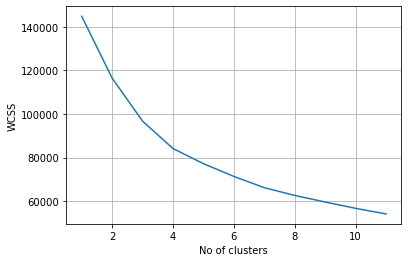

In [84]:
# wcss = within cluster sum of square
wcss = []
for i in range(1,12): # no of clusters
    m = KMeans(n_clusters=i) # in model we get wcss value from model.inertia_
    m.fit(x_reg)
    wcss.append(m.inertia_)

print('WCSS\n',wcss)
plt.plot(list(range(1,12)),wcss)
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

#### inference: using elbow method we found the bends in graph at k= 2,3,4,5

#### Q5. Find the optimum value of k for k-means clustering using the silhouette score method and specify the number of observations in each cluster using a bar plot

In [85]:
from sklearn.metrics import silhouette_score

In [86]:
for i in range(2,12):
    m = KMeans(n_clusters=i).fit(x_reg)
    print(f'Silhoutte Score at k={i}',silhouette_score(x_reg,m.labels_))

Silhoutte Score at k=2 0.30925326725873964
Silhoutte Score at k=3 0.2631834575337809
Silhoutte Score at k=4 0.20820020727596902
Silhoutte Score at k=5 0.20484102213838468
Silhoutte Score at k=6 0.2149680412708651
Silhoutte Score at k=7 0.22778498318240076
Silhoutte Score at k=8 0.2346702224734378
Silhoutte Score at k=9 0.22672901337673054
Silhoutte Score at k=10 0.21733249890039286
Silhoutte Score at k=11 0.21410964782101963


#### inference :  Silhoutte Score at k=2 is best and we get the same result from elbow method as well so we are using k=2 for clustering

In [87]:
from yellowbrick.cluster import SilhouetteVisualizer

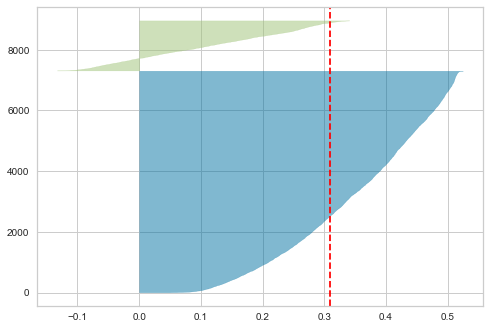

In [89]:
model1 = KMeans(n_clusters=2)
visualizer1 = SilhouetteVisualizer(model1,colors='yellowbrick')
visualizer1.fit(x_reg)
plt.show()

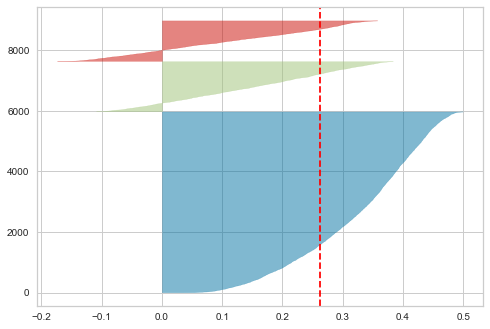

In [90]:
model2 = KMeans(n_clusters=3)
visualizer2 = SilhouetteVisualizer(model2,colors='yellowbrick')
visualizer2.fit(x_reg)
plt.show()

#### inference: optimal no of clusters are 2

#### Applying K-means at K=2

In [91]:
k2 = KMeans(n_clusters=2)
k2.fit(x_reg)

KMeans(n_clusters=2)

In [92]:
ypred2 = k2.predict(x_reg)
print(ypred2)

[0 0 0 ... 0 0 0]


In [93]:
cent2 = k2.cluster_centers_
print(cent2)

[[-0.83655528 -0.07780628 -0.0405253   0.00463164  0.02374936 -0.00606833
   0.01047724  0.01510625  0.00503777  0.02826582  0.0248342 ]
 [ 3.73995433  0.34784542  0.18117486 -0.0207065  -0.10617534  0.02712942
  -0.04684019 -0.06753491 -0.02252217 -0.1263669  -0.11102526]]


In [94]:
df1['Ypred'] = ypred2
df1.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Ypred
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1.0,1.0,7500.0,0.000000,0.000000,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12,0


In [95]:
res = df1.iloc[:,2:].groupby('Ypred').mean()
res.T

Ypred,0,1
PURCHASES,398.262093,3335.910622
ONEOFF_PURCHASES,210.168122,1992.117229
INSTALLMENTS_PURCHASES,188.379380,1259.315891
CASH_ADVANCE,984.063450,721.174384
PURCHASES_FREQUENCY,0.391057,0.933266
ONEOFF_PURCHASES_FREQUENCY,0.114751,0.593686
PURCHASES_INSTALLMENTS_FREQUENCY,0.281545,0.734190
CASH_ADVANCE_FREQUENCY,0.144266,0.088298
CASH_ADVANCE_TRX,3.262618,2.261745
PURCHASES_TRX,6.922309,46.397743


In [111]:
res.shape

(2, 15)

In [101]:
x_p = df1.drop('Ypred',axis=1)
y_p = df1['Ypred']

#### specify the number of observations in each cluster using a bar plot

#### Applying count plot on normal(original) dataframe

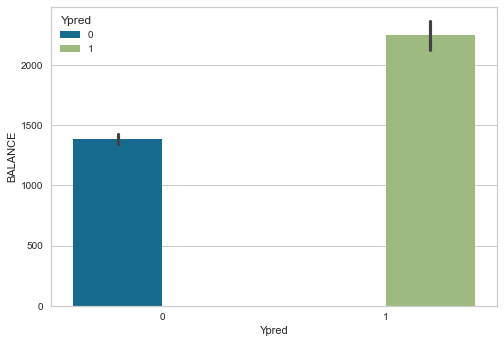

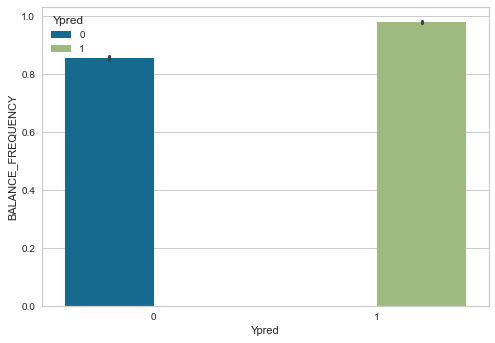

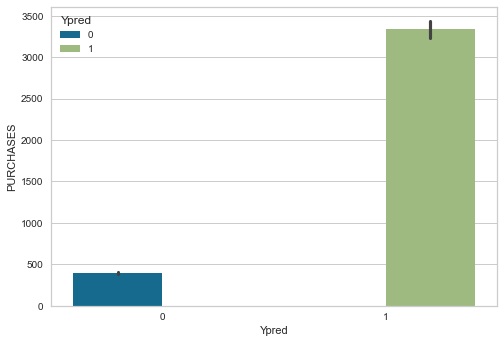

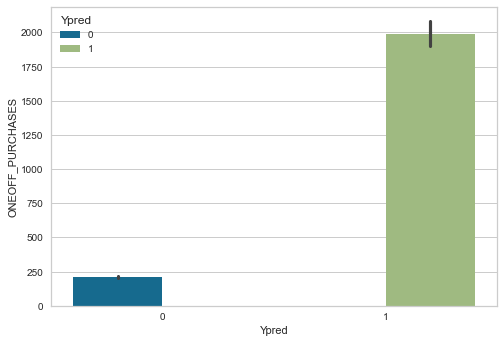

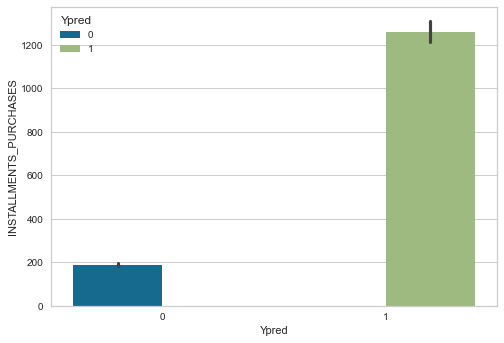

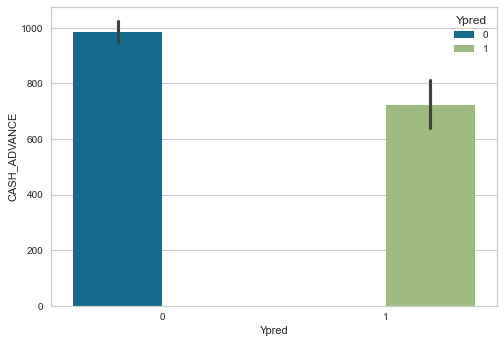

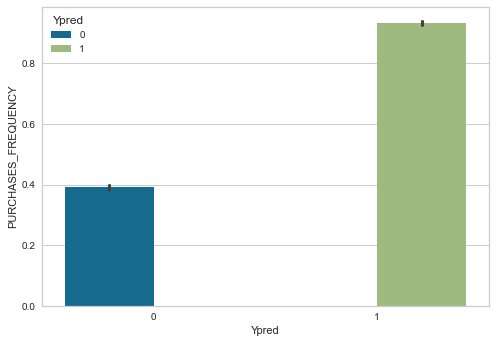

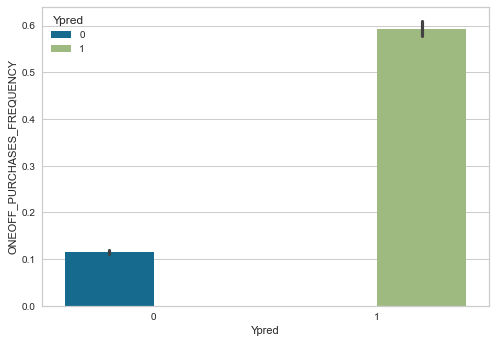

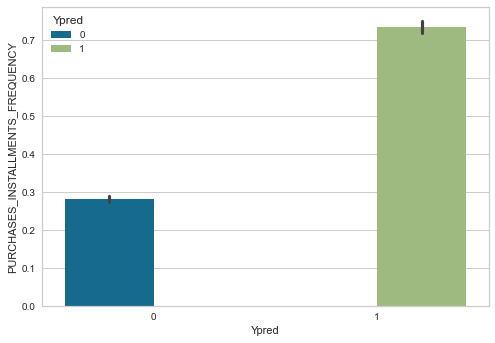

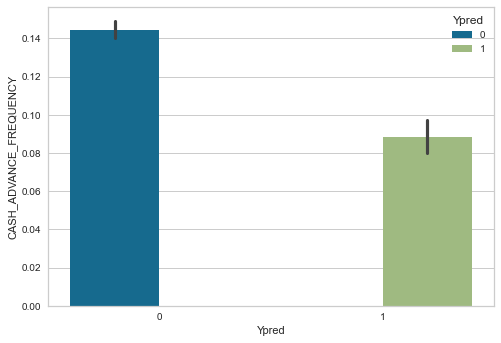

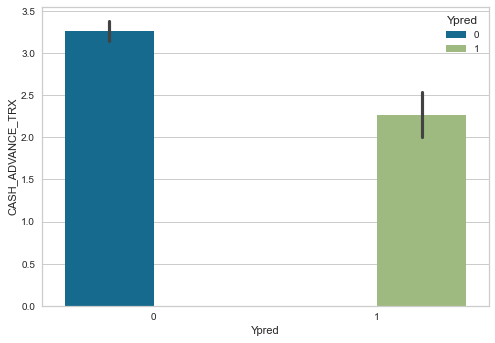

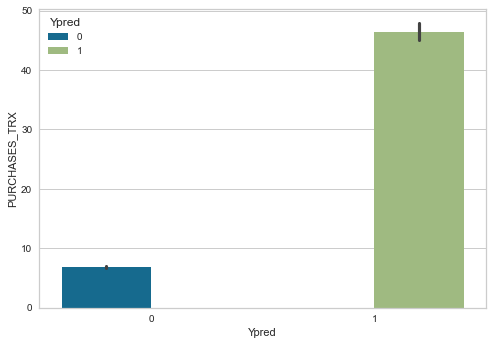

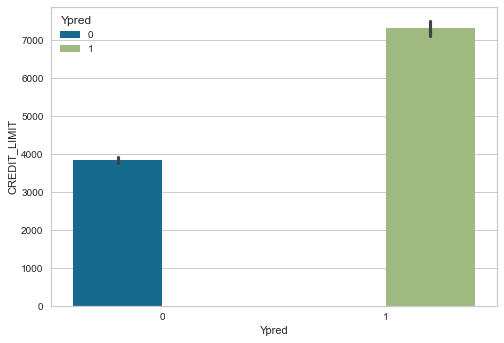

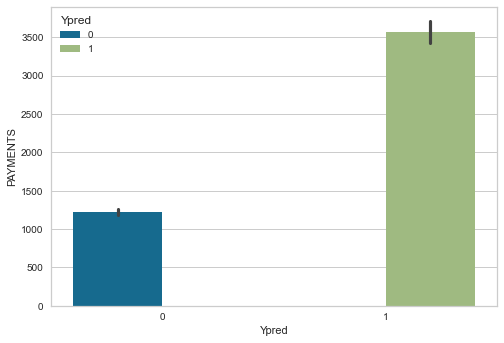

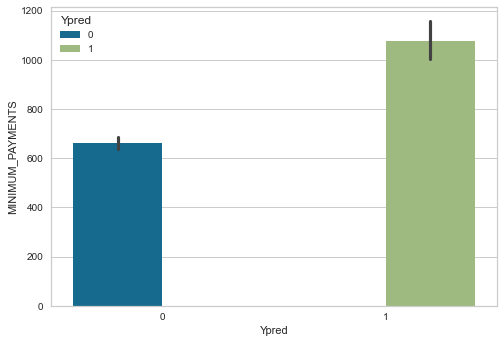

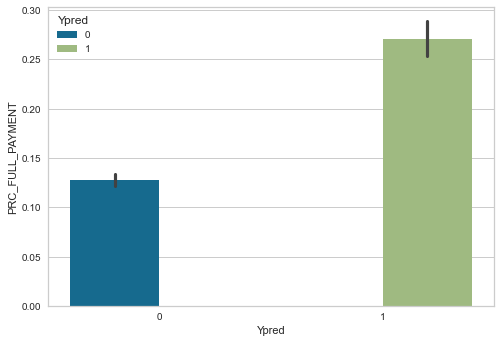

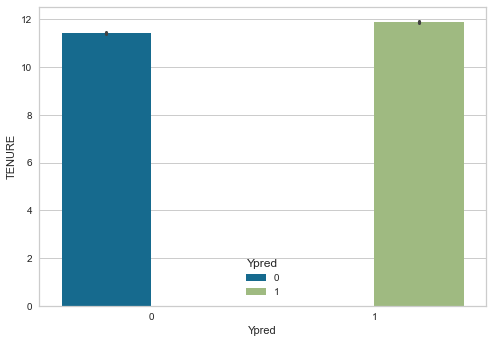

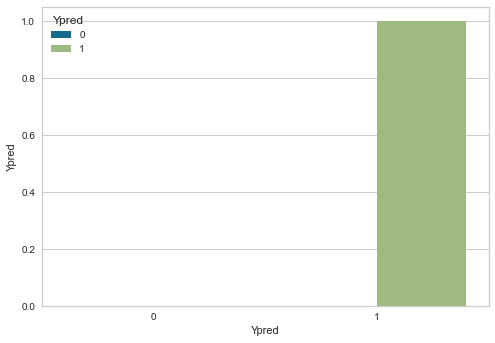

In [107]:
for i in df1.columns:
    sns.barplot(x=y_p,y=i,data=df1,hue='Ypred')
    plt.show()

In [125]:
df1['Ypred'].value_counts()

0    7311
1    1639
Name: Ypred, dtype: int64

#### inference: 
    if we total all the values we are getting from ploting boxplot and and observe the value of df1['Ypred'].value_counts()
    we can see that cluster0 have 7311 data point(records belong to it) and cluster1 have 1639 data points(records belong to  it)

#### count plot on mean data of dataframe

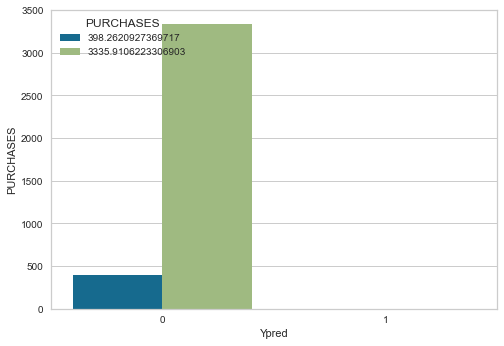

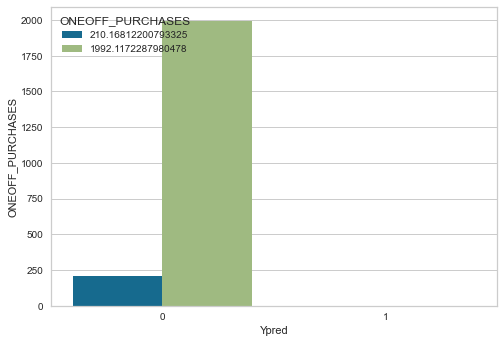

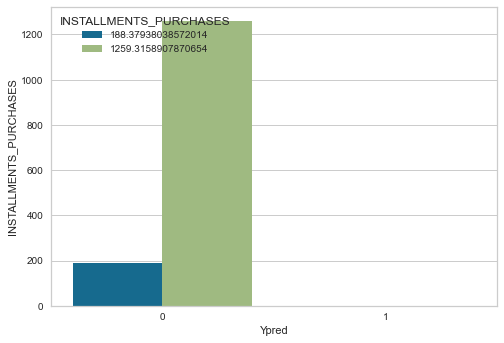

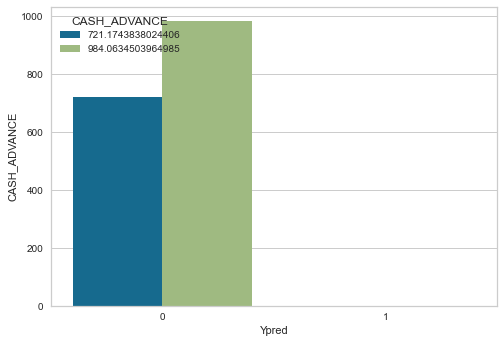

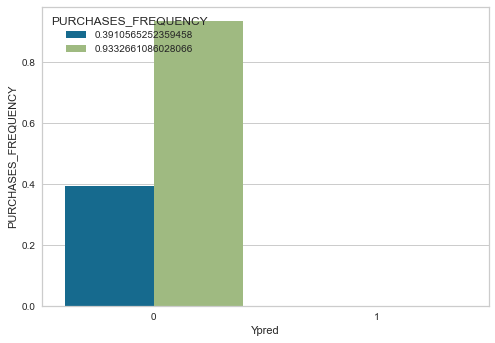

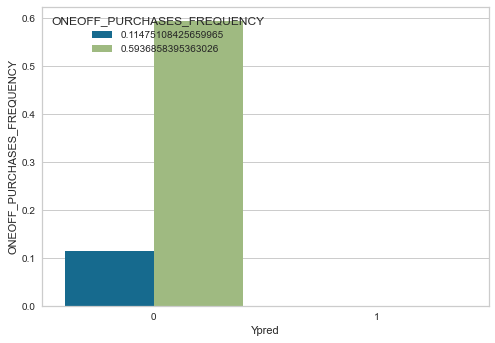

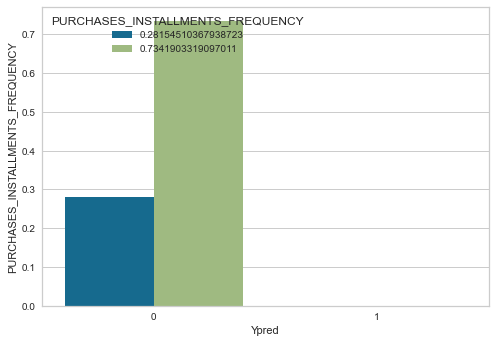

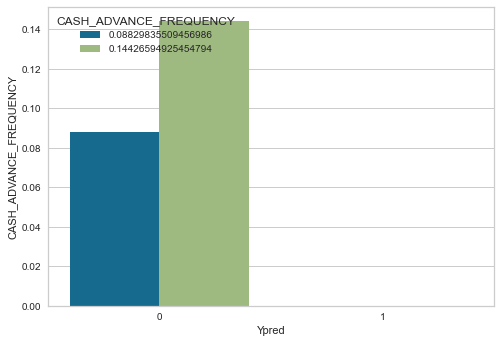

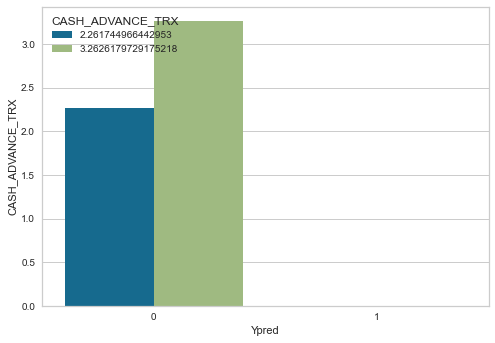

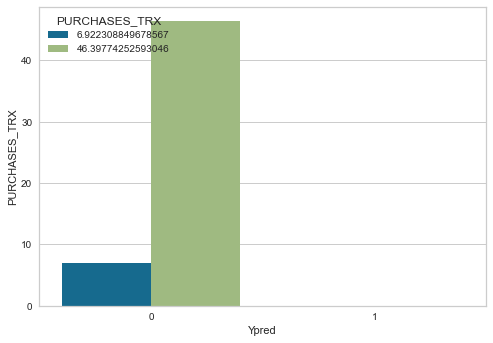

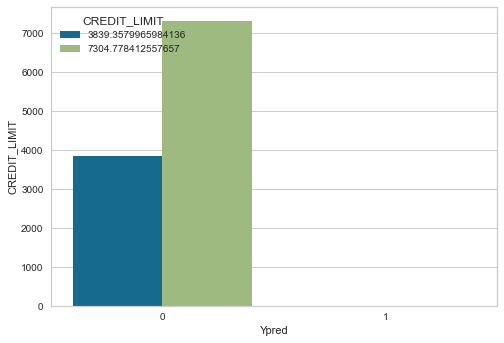

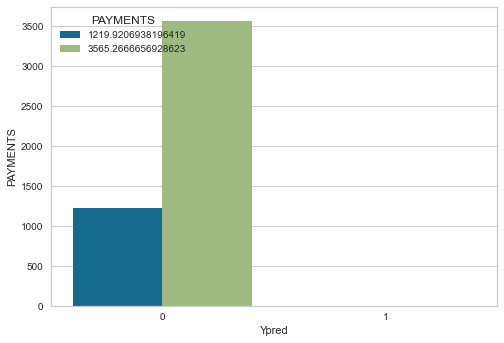

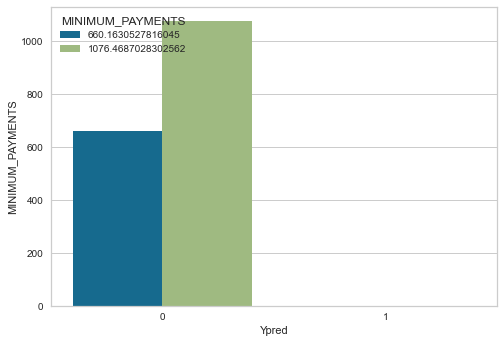

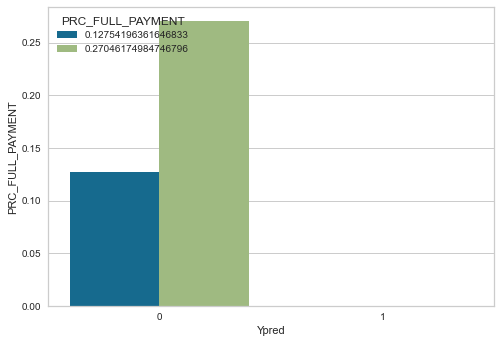

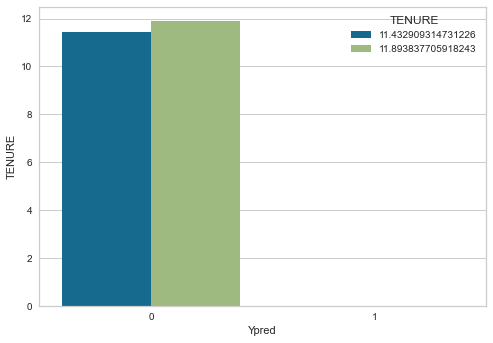

In [112]:
for i in res.columns:
    sns.barplot(x=y_p,y=i,data=res,hue=i)
    plt.show()